# EDA using SIFT

SIFT identifies keypoints that are distinctive across an image’s width, height, and most importantly, scale. By considering scale, we can identify keypoints that will remain stable (to an extent) even when the template of interest changes size, when the image quality becomes better or worse, or when the template undergoes changes in viewpoint or aspect ratio. Moreover, each keypoint has an associated orientation that makes SIFT features invariant to template rotations. Finally, SIFT will generate a descriptor for each keypoint, a 128-length vector that allows keypoints to be compared. These descriptors are nothing more than a histogram of gradients computed within the keypoint’s neighborhood.

# Let's have a look at some images and their Keypoints

In [1]:
import pathlib
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
curr_dir = os.getcwd()
parent_dir = pathlib.Path(curr_dir).parents[1]
filename = f"{parent_dir}/data/data_original/train.csv"
data_dir = f"{parent_dir}/data/data_original/train"

df = pd.read_csv(filename)
df_cell_compressed = df.drop_duplicates(subset=['id'])
df_cell_compressed.head(2)

id                                         annotation  width  \
0    0030fd0e6378  118145 6 118849 7 119553 8 120257 8 120961 9 1...    704   
395  0140b3c8f445  32499 3 33201 7 33902 9 34604 10 35306 11 3600...    704   

     height cell_type plate_time sample_date  \
0       520    shsy5y  11h30m00s  2019-06-16   
395     520     astro  09h00m00s  2020-09-13   

                              sample_id elapsed_timedelta  
0    shsy5y[diff]_E10-4_Vessel-714_Ph_3   0 days 11:30:00  
395  astros[cereb]_F8-3_Vessel-361_Ph_4   0 days 09:00:00

# celltype shsy5y

[ WARN:0@0.725] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


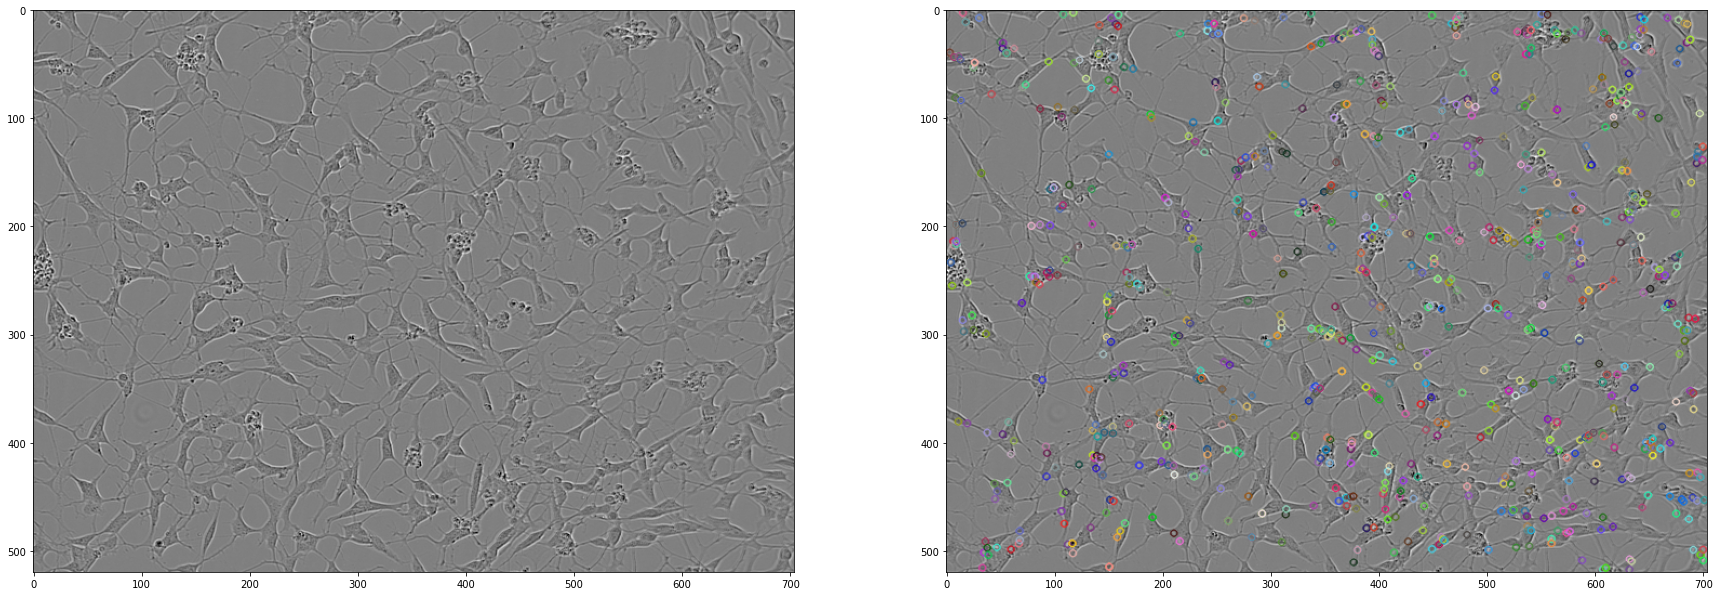

In [3]:
img_path = '../../data/data_original/train/0030fd0e6378.png'
img1 = cv2.imread(img_path)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
imag_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)

# plots
fig, arr = plt.subplots(1,2, figsize=(30, 30))
arr[0].imshow(cv2.imread(img_path))
arr[1].imshow(cv2.drawKeypoints(gray1,keypoints_1,img1))

# celltype astrocytes

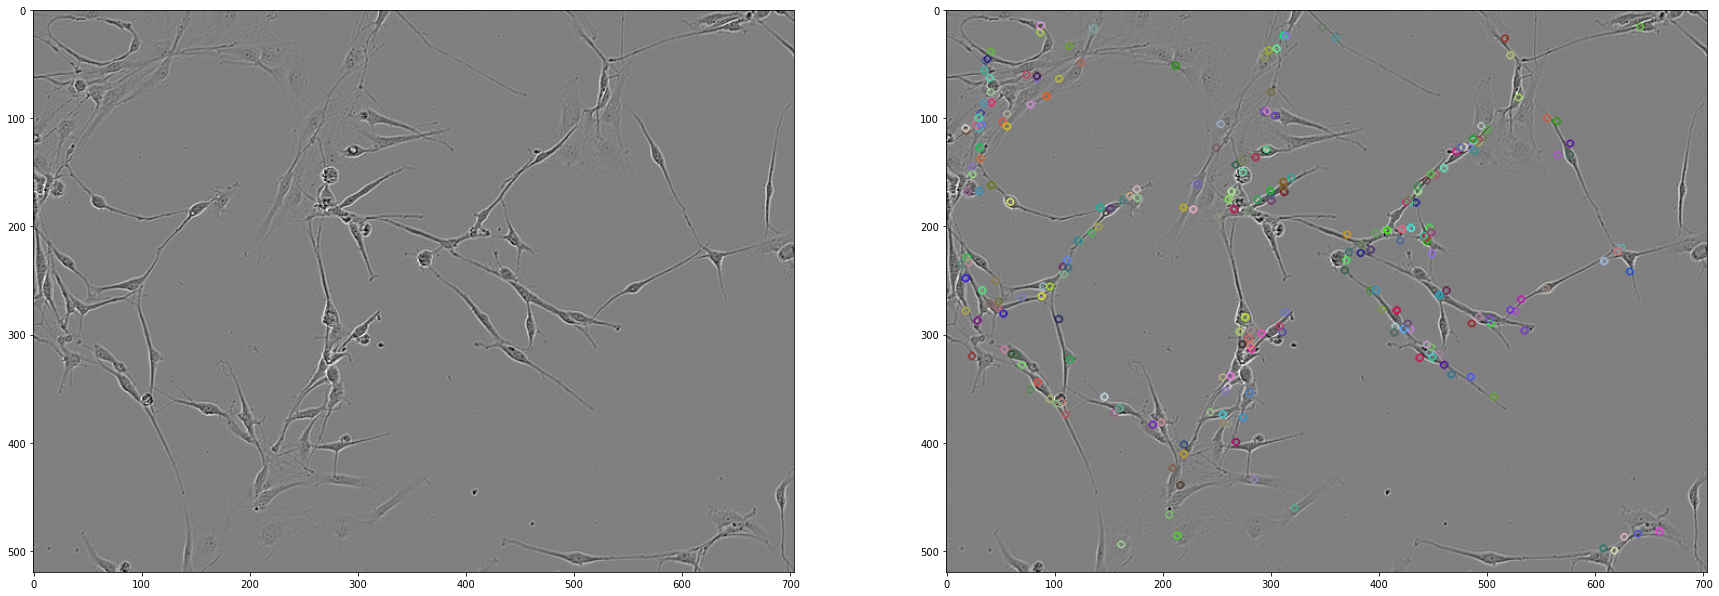

In [4]:
nOctaveLayers = 42

nfeatures=500
contrastThreshold = 0.05
edgeThreshold = 0.025
sigma = 0.98

img_path = '../../data/data_original/train/0140b3c8f445.png'
img1 = cv2.imread(img_path)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#keypoints
sift = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold,edgeThreshold, sigma)
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
imag_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)

# plots
fig, arr = plt.subplots(1,2, figsize=(30, 30))
arr[0].imshow(cv2.imread(img_path))
arr[1].imshow(cv2.drawKeypoints(gray1,keypoints_1,img1))

# celltype cort

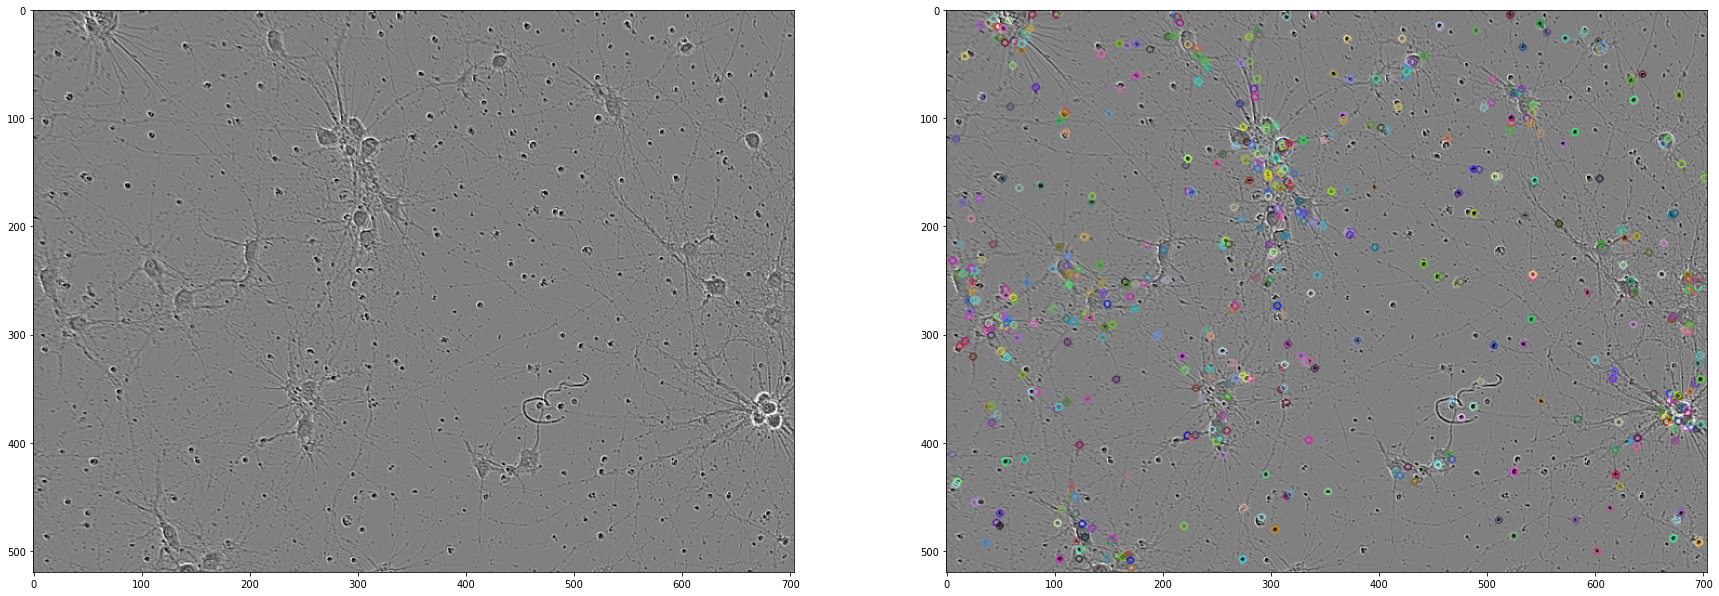

In [5]:
img_path = '../../data/data_original/train/01ae5a43a2ab.png'
img1 = cv2.imread(img_path)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
imag_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)

# plots
fig, arr = plt.subplots(1,2, figsize=(30, 30))
arr[0].imshow(cv2.imread(img_path))
arr[1].imshow(cv2.drawKeypoints(gray1,keypoints_1,img1))

# Feature Matching comparing images of different cell types

* we can compare images of different cell types and have a look if those images have the same keypoints

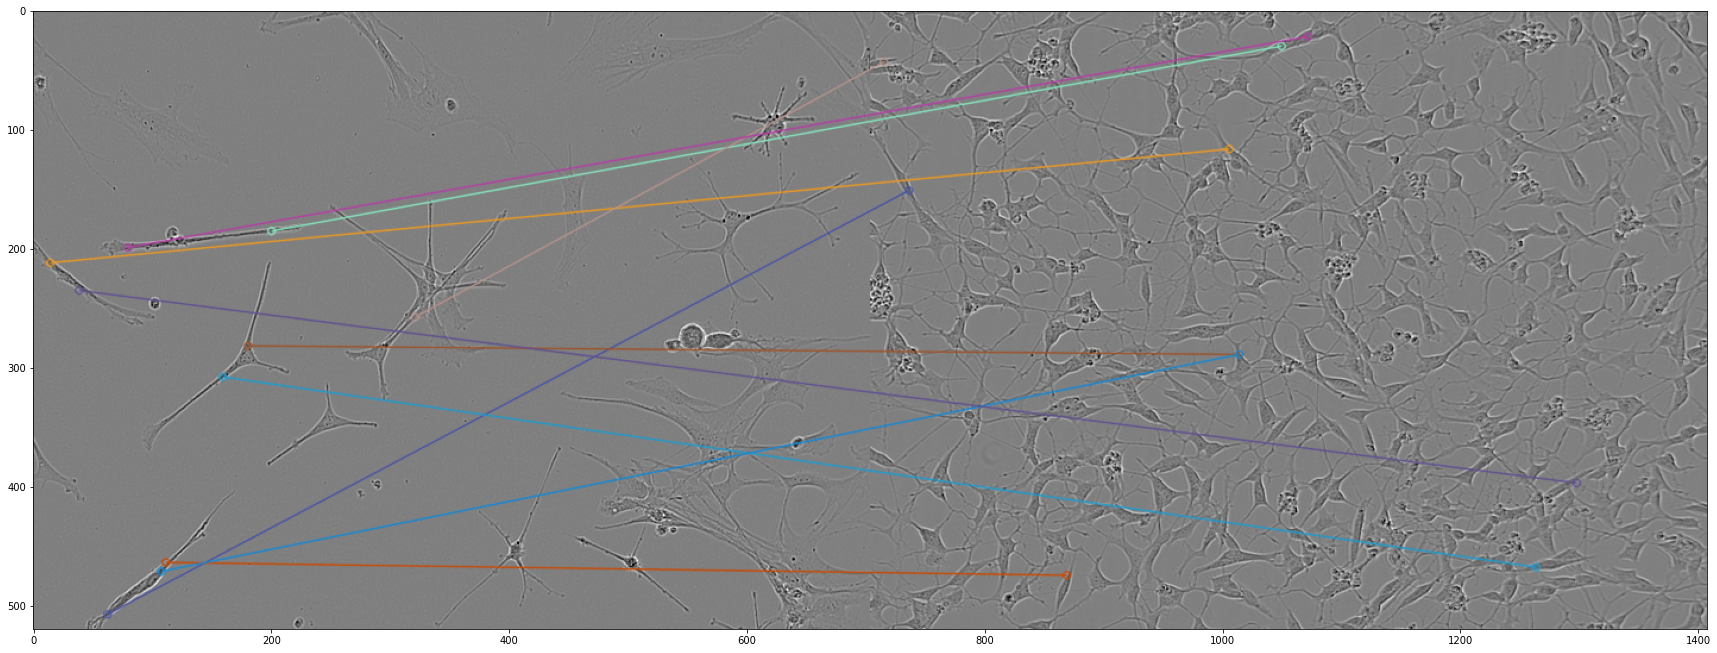

(<matplotlib.image.AxesImage at 0x17d269e80>, None)

In [6]:
img_path = '../../data/data_original/train/085eb8fec206.png' #astro
#img_path = '../../data/data_original/train/01ae5a43a2ab.png' #cort

img1 = cv2.imread(img_path)

#img_path2 = '../../data/data_original/train/01ae5a43a2ab.png' #same cort
#img_path2 = '../../data/data_original/train/026b3c2c4b32.png' #cort
img_path2 = '../../data/data_original/train/0030fd0e6378.png'#shsy5y
#img_path2 = '../../data/data_original/train/0140b3c8f445.png' #astrocytes
img2 = cv2.imread(img_path2)


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#sift
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:10], img2, flags=2)
fig= plt.figure(figsize=(30,60))
plt.imshow(img3),plt.show()

# Feature matching loop

* we go a step further and search for keypoint matches by looping over different images

In [7]:
img_path = '../../data/data_original/train/085eb8fec206.png' #astro
#img_path = '../../data/data_original/train/01ae5a43a2ab.png' #cort

img1 = cv2.imread(img_path)

#img_path2 = '../../data/data_original/train/01ae5a43a2ab.png' #same cort
#img_path2 = '../../data/data_original/train/026b3c2c4b32.png' #cort
img_path2 = '../../data/data_original/train/0030fd0e6378.png'#shsy5y
#img_path2 = '../../data/data_original/train/0140b3c8f445.png' #astrocytes



img1 = cv2.imread(img_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

match_lst = []
id_lst = []

img_path2 = '../../data/data_original/train/'
for item in os.listdir(img_path2):
    try:
        imgi = cv2.imread(img_path2 + item)
        imgi = cv2.cvtColor(imgi, cv2.COLOR_BGR2GRAY)
        #sift
        keypoints_i, descriptors_i= sift.detectAndCompute(imgi,None)
        #feature matching
        bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
        matches = bf.match(descriptors_1,descriptors_i)
        matches = sorted(matches, key = lambda x:x.distance)
        match_lst.append(len(matches))
        id_lst.append(item)
    except:
        print(item)   

.ipynb_checkpoints


# Playing with parameters of SIFT


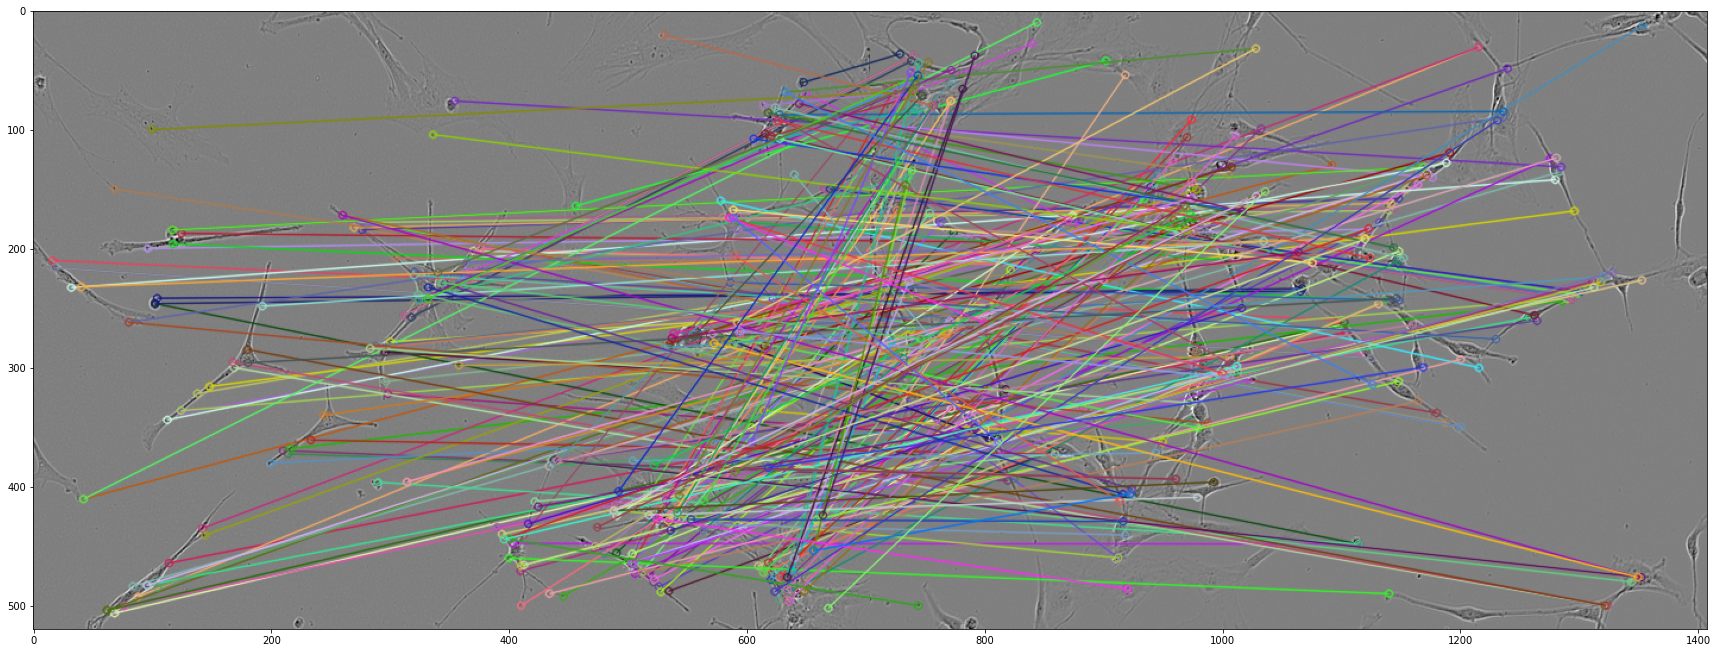

275


In [8]:
nOctaveLayers = 30
nfeatures=2000
contrastThreshold = 0.1
edgeThreshold = 0.2
sigma = 0.88

#img_path = '../../data/data_original/train/0140b3c8f445.png'
img_path = '../../data/data_original/train/085eb8fec206.png' #astro
img1 = cv2.imread(img_path)

#img_path2 = '../../data/data_original/train/01ae5a43a2ab.png' #same cort
#img_path2 = '../../data/data_original/train/026b3c2c4b32.png' #cort
#img_path2 = '../../data/data_original/train/0030fd0e6378.png'#shsy5y
img_path2 = '../../data/data_original/train/0140b3c8f445.png' #astrocytes
img2 = cv2.imread(img_path2)


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#sift
sift = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold,edgeThreshold, sigma)
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:500], img2, flags=2)
fig= plt.figure(figsize=(30,60))
plt.imshow(img3),plt.show()
print(len(matches))

# Classification with SIFT feature matching

As you can see in the dataframe above comparing the number of keypoint matches (NoKM) for each image pair, NoKM could be useful for classicication (Spoiler: Indeed, it turns out to be that case)

### 1. First, we calculate keypoints / descriptors for each img as before

* nice to know: sift.detect finds keypoints, sift.compute computes the descriptors from the keypoint we have found. the command used here (sift.detectAndCompute), does both at the same time

### 1.1 Train and test splitting

In [9]:
# Fixed seed for reproducability
RSEED = 42

In [10]:
df_cell_compressed2 = df_cell_compressed[['id','cell_type']]

id_temp = []
for i in range(0,df_cell_compressed2.shape[0]):
    id_temp.append("../../data/data_original/train/" + df_cell_compressed2.id.iloc[i] + ".png")

df_cell_compressed2['id'] = id_temp

# 1. We reserve 20% = ~516 images of our data as test data
train, test, y_train, y_test = train_test_split(df_cell_compressed2, 
                                                df_cell_compressed2.cell_type, 
                                                test_size=0.3, random_state=RSEED)

train.to_csv('cells_train.csv', header = False, index = False)
test.to_csv('cells_test.csv', header = False, index = False)


/var/folders/2j/7sxjj0vx4xn5110nf944ph440000gn/T/ipykernel_4303/3744761490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cell_compressed2['id'] = id_temp


In [11]:
df_train = pd.read_csv('cells_train.csv', names=["img_path", "cell_type"])
df_test = pd.read_csv('cells_test.csv', names=["img_path", "cell_type"])

### 2.1 keypoint detection for the train set

In [12]:
nOctaveLayers = 42

nfeatures=500
contrastThreshold = 0.05
edgeThreshold = 0.1
sigma = 1


sift = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)

train_keypoint_lst = []
train_descriptor_lst = []
train_img_lst = []
train_cell_lst = []
for i in range(0,df_train.shape[0]):  #key_train_df.shape[0]  
        imgi = cv2.imread(df_train.img_path[i]) 
        imgi = cv2.cvtColor(imgi, cv2.COLOR_BGR2GRAY)
        #sift
        keypoints_i, descriptors_i= sift.detectAndCompute(imgi,None)
        #feature matching
        train_img_lst.append(df_train.img_path[i])
        train_cell_lst.append(df_train.cell_type[i])
        train_keypoint_lst.append(keypoints_i)
        train_descriptor_lst.append(descriptors_i)
key_train_df = pd.DataFrame()
key_train_df['img'] = train_img_lst
key_train_df['cell_type'] = train_cell_lst
key_train_df['keypoints'] = train_keypoint_lst
key_train_df['descriptors'] = train_descriptor_lst

In [13]:
key_train_df.head(1)

img cell_type  \
0  ../../data/data_original/train/ec5b56d79061.png      cort   

                                           keypoints  \
0  (<KeyPoint 0x17d21eb10>, <KeyPoint 0x17d1f3d80...   

                                         descriptors  
0  [[61.0, 30.0, 39.0, 35.0, 53.0, 47.0, 55.0, 22...

## 2.2 keypoint detection for the test set

In [14]:
test_keypoint_lst = []
test_descriptor_lst = []
test_img_lst = []
test_cell_lst = []
for i in range(0,df_test.shape[0]):  #key_test_df.shape[0]         
        imgi = cv2.imread(df_test.img_path[i]) 
        imgi = cv2.cvtColor(imgi, cv2.COLOR_BGR2GRAY)
        #sift
        keypoints_i, descriptors_i= sift.detectAndCompute(imgi,None)
        #feature matching
        test_img_lst.append(df_test.img_path[i])
        test_cell_lst.append(df_test.cell_type[i])
        test_keypoint_lst.append(keypoints_i)
        test_descriptor_lst.append(descriptors_i)
key_test_df = pd.DataFrame()
key_test_df['img'] = test_img_lst
key_test_df['cell_type'] = test_cell_lst
key_test_df['keypoints'] = test_keypoint_lst
key_test_df['descriptors'] = test_descriptor_lst

In [15]:
key_test_df.head(1)

img cell_type  \
0  ../../data/data_original/train/efdf3822846c.png      cort   

                                           keypoints  \
0  (<KeyPoint 0x105ed8e70>, <KeyPoint 0x17d1e7540...   

                                         descriptors  
0  [[83.0, 29.0, 50.0, 102.0, 63.0, 42.0, 46.0, 9...

3. Calculating NoKM for each image from the test test with every image of the train set

* How do we use that to classify:
Let's say, image "x" (from test) has 200 keypoints. We check each image from train set wether it has the same keypoints, count the numbers of those keypoints (keypoint matches) und put it into a list. After iterating through all images in the train set, we sort the list with the highest NoKM on top of a dataframe, in which the corresponding cell type of the train image is also saved.

* Now, we do a voting with the first 30 images. The cell type which occurs the most, defines the label of the test image.



In [16]:
y_pred = []
y_actual = []
j_start = 0
j_end = key_test_df.shape[0] 

for j in range(j_start, j_end): #key_train_df.shape[0] 
    match_lst = []
    cell_lst = []
    keypoints_j = key_test_df.keypoints[j]
    descriptors_j = key_test_df.descriptors[j]
    start = timeit.default_timer()

    for i in range(0, key_train_df.shape[0]):  #df_train.shape[0]         
        #sift
        keypoints_i =  key_train_df.keypoints[i]
        descriptors_i= key_train_df.descriptors[i]
        #feature matching
        bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
        matches = bf.match(descriptors_j,descriptors_i)
        matches = sorted(matches, key = lambda x:x.distance)
        match_lst.append(len(matches))
        cell_lst.append(df_train.cell_type[i])
    #create temporary dataframe
    new_df = pd.DataFrame()
    new_df['keypoint_matches'] = match_lst
    new_df['cell_type'] = cell_lst
    new_df = new_df.sort_values('keypoint_matches', ascending = False).head(29)
    y_pred.append(list(new_df.cell_type.mode()))
    y_actual.append(df_test.cell_type[j])
    print(j+1, 'von', j_end+1)
    print('actual cell_type:', df_test.cell_type[j])
    print('predicted cell_type:',list(new_df.cell_type.mode()))
    #time measurement
    stop = timeit.default_timer()
    print('This prediction took', stop - start, 'seconds')
    print('---'*10)  
    del new_df

sum_df = pd.DataFrame()
sum_df['actual'] = y_actual
sum_df['predicted'] = y_pred
sum_df

1 von 183
actual cell_type: cort
predicted cell_type: ['cort']
This prediction took 1.5916274159999944 seconds
------------------------------
2 von 183
actual cell_type: cort
predicted cell_type: ['cort']
This prediction took 1.6277185829999894 seconds
------------------------------
3 von 183
actual cell_type: shsy5y
predicted cell_type: ['shsy5y']
This prediction took 1.6458805419999862 seconds
------------------------------
4 von 183
actual cell_type: cort
predicted cell_type: ['cort']
This prediction took 1.6367449580000084 seconds
------------------------------
5 von 183
actual cell_type: cort
predicted cell_type: ['cort']
This prediction took 1.638601125000008 seconds
------------------------------
6 von 183
actual cell_type: cort
predicted cell_type: ['cort']
This prediction took 1.6506681670000205 seconds
------------------------------
7 von 183
actual cell_type: cort
predicted cell_type: ['cort']
This prediction took 1.6624637500000006 seconds
------------------------------
8 v

actual predicted
0      cort    [cort]
1      cort    [cort]
2    shsy5y  [shsy5y]
3      cort    [cort]
4      cort    [cort]
..      ...       ...
177    cort    [cort]
178  shsy5y  [shsy5y]
179   astro   [astro]
180   astro   [astro]
181   astro  [shsy5y]

[182 rows x 2 columns]

## 3. corresponding Confusion Matrix

              precision    recall  f1-score   support

       astro       1.00      0.54      0.70        41
        cort       1.00      1.00      1.00        93
      shsy5y       0.71      1.00      0.83        46

    accuracy                           0.89       180
   macro avg       0.90      0.85      0.84       180
weighted avg       0.93      0.89      0.89       180



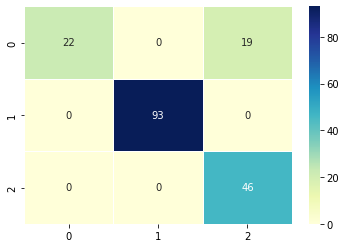

In [18]:
a = sum_df.drop(sum_df.index[[80, 129]]) #we drop them, because voting is not distinct
y_test = list(a.actual)
y_pred = list(a.predicted)
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

report_dt = classification_report(y_test, y_pred)
print(report_dt)

In [19]:
a.to_csv('summary_sift_classification.csv', header = True, index = False)

# Summary

The classification of this (very straight forward) method is surprisingly accurate (0.89). Unfortunately, we misclassify 54% of the astrocytes as shsy5y. This seems to be a limitation of this method when it comes to this microscopic images. Other SIFT parameters lead to worse results.
The drawback of this method is the running time of the algorithm, escpecially the calculations of the keypoints takes several minutes on just 600 images. Therefore, we skip using this method for an increased dataset.